In [1]:
%cd /content/drive/MyDrive/Capstone Code

/content/drive/MyDrive/Capstone Code


In [8]:
#! tar -xf train-clean-100.tar.gz
# https://www.nature.com/articles/s41467-022-32012-w.

In [2]:
#! pip install mutagen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#! pip install phonemizer

In [3]:
%ls LibriSpeech/

BOOKS.TXT     LICENSE.TXT  SPEAKERS.TXT
CHAPTERS.TXT  README.TXT   train-clean-100/


In [37]:
import os
import csv
import nltk
import numpy as np
from collections import defaultdict
from mutagen import flac
from matplotlib import pyplot as plt
#from nltk.corpus.reader import cmudict
#from nltk.tokenize import word_tokenize
#from phonemizer import phonemize

DATA_PATH = "LibriSpeech/train-clean-100/"

In [5]:
def load_transcripts_list(filename):
    with open(filename,'r') as transcript_list_f: 
        return [line.strip() for line in transcript_list_f]

In [7]:
i = 0
# dictionary -> filename : (seconds, transcript)
soundbytes = {}
dirs = os.listdir(DATA_PATH)

with open("transcipts.csv", 'w') as outfile:
  writer = csv.writer(outfile)
  for dir in dirs:
    i += 1
    print("Folder #"+str(i)+": dir name "+dir)
    subdirs = os.listdir(os.path.join(DATA_PATH, dir))
    for subdir in subdirs:
      subdirfs = os.listdir(os.path.join(DATA_PATH, dir, subdir))
      for file in subdirfs:
        if file.endswith(".txt"):
          transcript = load_transcripts_list(os.path.join(DATA_PATH, dir, subdir, file))
          for line in transcript:
            words = line.split()
            audio = flac.FLAC(os.path.join(DATA_PATH, dir, subdir, (words[0]+".flac")))
            writer.writerow([words[0]] + [audio.info.length] + words[1:])
            soundbytes[words[0]] = (audio.info.length, words[1:])


Folder #1: dir name 6818
Folder #2: dir name 6147
Folder #3: dir name 5022
Folder #4: dir name 2910
Folder #5: dir name 3983
Folder #6: dir name 2836
Folder #7: dir name 89
Folder #8: dir name 3235
Folder #9: dir name 4853
Folder #10: dir name 7780
Folder #11: dir name 4340
Folder #12: dir name 1246
Folder #13: dir name 1447
Folder #14: dir name 2817
Folder #15: dir name 5561
Folder #16: dir name 4088
Folder #17: dir name 8014
Folder #18: dir name 4640
Folder #19: dir name 19
Folder #20: dir name 248
Folder #21: dir name 4362
Folder #22: dir name 5163
Folder #23: dir name 4297
Folder #24: dir name 8975
Folder #25: dir name 7178
Folder #26: dir name 587
Folder #27: dir name 5789
Folder #28: dir name 3947
Folder #29: dir name 1737
Folder #30: dir name 40
Folder #31: dir name 1183
Folder #32: dir name 4680
Folder #33: dir name 6531
Folder #34: dir name 6078
Folder #35: dir name 250
Folder #36: dir name 87
Folder #37: dir name 8123
Folder #38: dir name 8051
Folder #39: dir name 4481
Folder

In [28]:
clip_lens = [value[0] for value in soundbytes.values()]

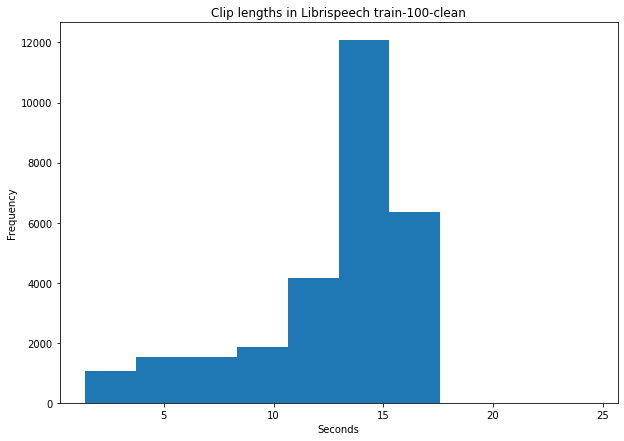

In [35]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(np.array(clip_lens))

plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.title('Clip lengths in Librispeech train-100-clean')

plt.show()

In [19]:
phoneme_dict = nltk.corpus.cmudict.dict()

In [46]:
num_words = 0
phoneme_count = defaultdict(int)
for clip in soundbytes.keys():
  for word in soundbytes[clip][1]:
    num_words += 1
    try:
        phs = phoneme_dict[word.lower()][0]
        for ph in phs:
          # ignores stress notation
          phoneme_count[''.join([i for i in ph if not i.isdigit()])] += 1
    except Exception as e:
        phoneme_count['UNK'] += 1

In [51]:
100*phoneme_count['UNK']/num_words

1.708613565686733

In [57]:
phoneme_count.pop('UNK', None)
sort_counts = sorted(phoneme_count.items(), key=lambda item: item[1])

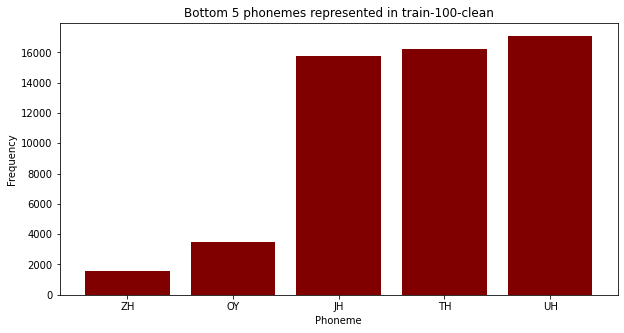

In [65]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar([pair[0] for pair in sort_counts[:5]], 
        [pair[1] for pair in sort_counts[:5]],
        color ='maroon',
        width = 0.8)
 
plt.xlabel("Phoneme")
plt.ylabel("Frequency")
plt.title("Bottom 5 phonemes represented in train-100-clean")
plt.show()

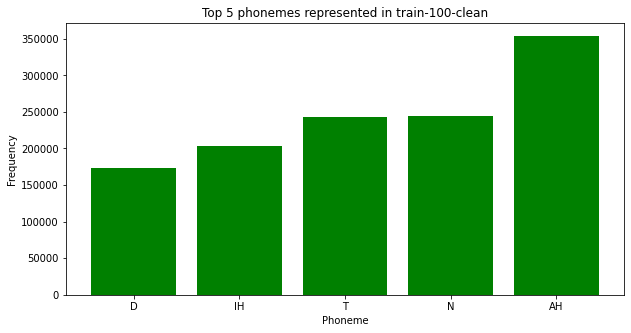

In [66]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar([pair[0] for pair in sort_counts[-5:]], 
        [pair[1] for pair in sort_counts[-5:]],
        color ='green',
        width = 0.8)
 
plt.xlabel("Phoneme")
plt.ylabel("Frequency")
plt.title("Top 5 phonemes represented in train-100-clean")
plt.show()